In [4]:
import tensorflow as tf
from src.dataset import mfccs_dataset, OSBH_PATH

train_mfccs_ds, val_mfccs_ds, label_names, input_shape = mfccs_dataset(OSBH_PATH, 0.2, 12)

Found 900 files belonging to 2 classes.
Using 720 files for training.
Using 180 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (12, 4000)
Example label shape: (12,)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)

===== MFCCs (num_spectrogram_bins, sample_rate, num_mfccs) ====
513 44100 12
513 44100 12

Before balancing
Queen: 37% (269), Noqueen: 63% (451)

After balancing
Queen: 50% (269), Noqueen: 50% (269)

 ==== MFCCs input shape ==== 
(12, 12, 1)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5247 - loss: 0.7600 - val_accuracy: 0.7667 - val_loss: 0.6290
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - loss: 0.6612 - val_accuracy: 0.8222 - val_loss: 0.5930
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.6241 - val_accuracy: 0.8444 - val_loss: 0.5509
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.5847 - val_accuracy: 0.8500 - val_loss: 0.5065
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.5405 - val_accuracy: 0.8611 - val_loss: 0.4731
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.5174 - val_accuracy: 0.8500 - val_loss: 0.4492
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8386 - loss: 0.4649 - val_accuracy: 0.8389 - val_loss: 0.4310
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4414 - val_accuracy: 0.8500 - val_loss:

2025-05-13 19:53:43.583629: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.2433 - val_accuracy: 0.9278 - val_loss: 0.1923
Epoch 29/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8875 - loss: 0.2808 - val_accuracy: 0.9444 - val_loss: 0.1797
Epoch 30/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8969 - loss: 0.2303 - val_accuracy: 0.9333 - val_loss: 0.1869
Epoch 31/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9090 - loss: 0.2606 - val_accuracy: 0.9556 - val_loss: 0.1721
Epoch 32/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9073 - loss: 0.2318 - val_accuracy: 0.9500 - val_loss: 0.1677
Epoch 33/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2182 - val_accuracy: 0.9556 - val_loss: 0.1699
Epoch 34/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9311 - loss: 0.1941 - val_accuracy: 0.9389 - val_loss: 0.1782
Epoch 35/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8978 - loss: 0.2500 - val_accuracy: 0.9611 - val_loss: 0.1

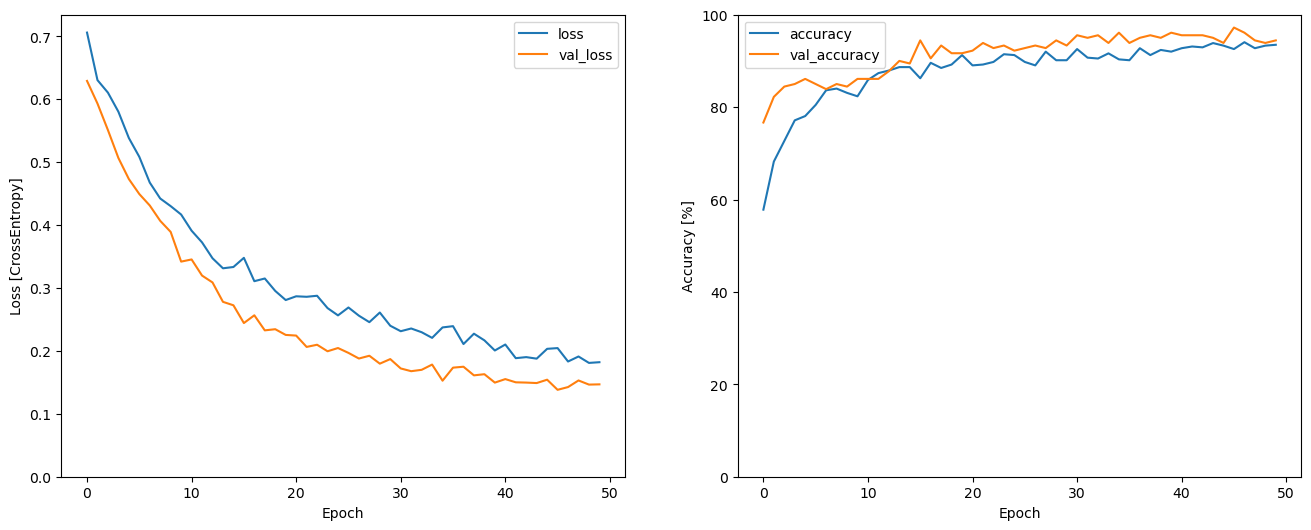

In [14]:
from src.model import get_conv_model, callbacks
from src.plots import plot_history

LEARNING_RATE = 0.0001

model = get_conv_model(input_shape, len(label_names))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    train_mfccs_ds,
    validation_data=val_mfccs_ds,
    epochs=50,
    # callbacks=callbacks
)
plot_history(history)

In [18]:
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f}, Val. Loss: {history.history['val_loss'][-1]:.2f}, Val. Acc: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("OSBH + MFCCs + Conv model       ", history)
model.save('models/osbh_mfcc_conv.keras')

OSBH + MFCCs + Conv model       :    Loss: 0.18, Acc: 0.93, Val. Loss: 0.15, Val. Acc: 0.94
